In [1]:
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

c:\Users\micha\miniconda3\envs\bayesopt\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
palette = sns.color_palette("muted",10)
palette2 = sns.color_palette("muted",10)
color=palette[1]

In [18]:
sol_true = pd.read_csv("Data/inference_traj.csv").to_numpy()[0]
targ = np.squeeze(pd.read_csv("Data/desired_traj.csv").to_numpy())
sns.set_context('paper', font_scale=1.5)
sns.set_style("white")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.lineplot(ax=axes[0],x=np.linspace(100, 200, 1000), linewidth = 3, y=sol_true, label = "Data")

axes[0].set_xlabel('Time')
axes[0].set_ylabel('Expression')
axes[0].set_title('Inference data')
sns.despine()
axes[0].set_ylim(0, 500)

sns.lineplot(ax=axes[1], x=np.linspace(100, 200, 1000), y=targ, label="Desired Output",linewidth = 3)
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Expression')
axes[1].set_title('Desired behaviour')
axes[1].set_ylim(0, 500)
sns.despine(ax=axes[1])

plt.tight_layout()
plt.savefig("data.pdf", format="pdf", bbox_inches="tight")


FileNotFoundError: [Errno 2] No such file or directory: 'Data/inference_traj.csv'

In [32]:
params = pd.read_csv("Data/posterior_samples.csv")
unc_params = params.to_numpy()
unc_params_df = pd.DataFrame(unc_params, columns=['Degradation (γ)', 'Hill Coefficient (n)'])
kde_plot = sns.kdeplot(
    data=unc_params_df, 
    x='Degradation (γ)', 
    y='Hill Coefficient (n)', 
    fill=True, 
    bw_adjust=1.5
)


ground_truth = [0.5, 2.0]
plt.scatter(ground_truth[0], ground_truth[1], color='salmon', edgecolors='black', s=75, label='Ground Truth')

posterior_color = sns.color_palette()[0]  
posterior_patch = mpatches.Patch(color=posterior_color, label='Posterior')

plt.legend(handles=[posterior_patch, Line2D([0], [0], marker='o', color='w', markerfacecolor="salmon", label='Ground Truth', markeredgecolor='black')])
plt.title("Posterior over Uncertain Parameters")
sns.despine()
plt.tight_layout()
plt.savefig("Posterior.pdf", format="pdf", bbox_inches="tight")

plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Data/posterior_samples.csv'

C:\Users\micha\AppData\Local\Temp\ipykernel_7744\852497599.py:7: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  ax = sns.violinplot(data=combination[:,exemplar],linewidth=1.5,palette=palette2, cut=0)


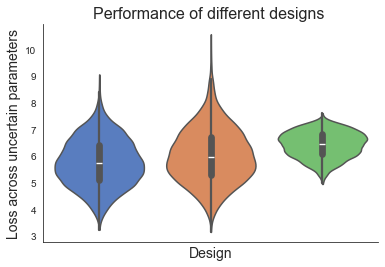

In [33]:
combination = pd.read_csv("evaluation.csv", header=None).to_numpy()

exemplar = [28, 24, 34]

sns.set_style("white")

ax = sns.violinplot(data=combination[:,exemplar],linewidth=1.5,palette=palette2, cut=0)
ax.set_xlabel('Design',fontsize=14)
ax.set_ylabel('Loss across uncertain parameters',fontsize=14)
ax.set_xticks([])
ax.set_title('Performance of different designs ',fontsize=16)
sns.despine()

plt.savefig("violin_plot.pdf", format="pdf", bbox_inches="tight")

In [ ]:
exemplar[1]

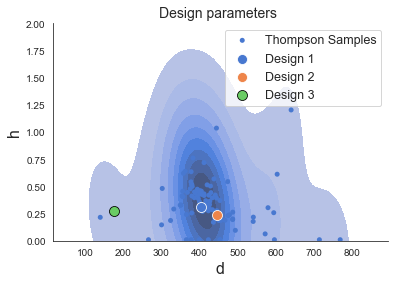

In [34]:
params = pd.read_csv("thompson_samples.csv", header=None).to_numpy()
sns.set_style("white")
ax2 = sns.kdeplot(x=params[:, 0], y=params[:, 1],fill=True, color = palette[0])
ax2 = sns.scatterplot(x=params[:, 0], y=params[:, 1],color = palette[0], s=25, label='Thompson Samples',edgecolor="none")
ax2 = sns.scatterplot(x=params[[exemplar[0]], 0], y=params[[exemplar[0]], 1],color = palette[0], s=100, label='Design 1', edgecolor="white")
ax2 = sns.scatterplot(x=params[[exemplar[1]], 0], y=params[[exemplar[1]], 1],color = palette[1], s=100, label='Design 2', edgecolor="white")
ax2 = sns.scatterplot(x=params[[exemplar[2]], 0], y=params[[exemplar[2]], 1],color = palette[2], s=100, label='Design 3', edgecolor="black")
ax2.set_xlabel('d',fontsize=16)
ax2.set_ylabel('h',fontsize=16)
ax2.set_ylim(0,2)
ax2.set_title('Design parameters ',fontsize=14)
ax2.legend(fontsize='12.5')
sns.despine()

params_filt = params
plt.savefig("designs_plot.pdf", format="pdf", bbox_inches="tight")

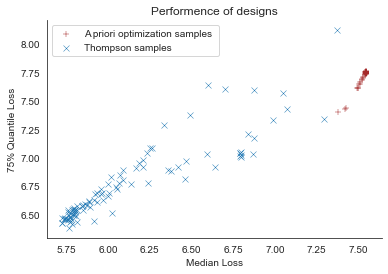

In [42]:
combination_prior = pd.read_csv("evaluation_prior.csv", header=None).to_numpy()
def median_larger(row):
    median = np.median(row)
    return np.median(row[row>median])

med_larg = np.apply_along_axis(median_larger, 0, combination)
mean = np.median(combination, axis=0)

med_larg_prior = np.apply_along_axis(median_larger, 0, combination_prior)
mean_prior = np.median(combination_prior, axis=0)



p = sns.scatterplot(x=mean_prior, y=med_larg_prior, label="A priori optimization samples ", marker="+", color="brown")
sns.scatterplot(x=mean,y=med_larg, marker="x", label="Thompson samples")
p.set_title("Performence of designs")
p.set_xlabel("Median Loss")
p.set_ylabel("75% Quantile Loss")
sns.set_style("white")
sns.despine()
plt.savefig("performance_of_designs.pdf")

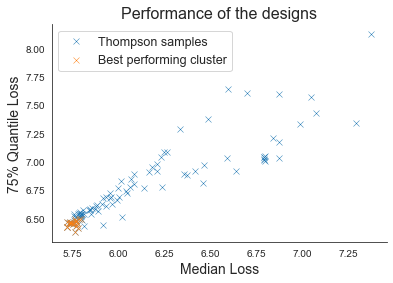

In [41]:
sns.set_style("white")
indices_cluster = np.squeeze(pd.read_csv("cluster_indices.csv", header=None).to_numpy()) - 1
centroid = np.squeeze(pd.read_csv("centroid.csv", header=None).to_numpy())

p = sns.scatterplot(x=mean,y=med_larg, marker="x", label="Thompson samples")
p = sns.scatterplot(x=mean[indices_cluster],y=med_larg[indices_cluster], marker="x", label="Best performing cluster")

p.set_title("Performance of the designs",fontsize=16)
p.set_xlabel("Median Loss",fontsize=14)
p.set_ylabel("75% Quantile Loss",fontsize=14)

sns.despine()

plt.legend(fontsize=12.5)

plt.savefig("Thompson.pdf", format="pdf", bbox_inches="tight")
plt.show()

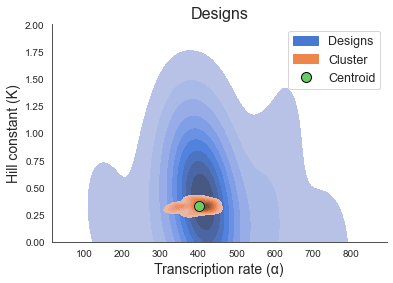

In [37]:
params = pd.read_csv("thompson_samples.csv",  header=None).to_numpy()
sns.set_style("white")
ax2 = sns.kdeplot(x=params[:, 0], y=params[:, 1],fill=True, color = palette[0])
ax2 = sns.kdeplot(x=params[indices_cluster, 0], y=params[indices_cluster, 1],color = palette[1], fill=True)
ax2 = sns.scatterplot(x=[centroid[0]], y=[centroid[1]],color = palette[2], s=100, label='Centroid', edgecolor="black")
ax2.set_xlabel('Transcription rate (α)',fontsize=14)
ax2.set_ylabel('Hill constant (K)',fontsize=14)
ax2.set_ylim(0,2)
ax2.set_title('Designs',fontsize=16)
params_filt = params

design_patch = mpatches.Patch(color=palette[0], label='Designs')
cluster_patch = mpatches.Patch(color=palette[1], label='Cluster')
centroid_point = Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[2], markersize=10, label='Centroid', markeredgecolor='black')

sns.despine()
ax2.legend(handles=[design_patch, cluster_patch, centroid_point], fontsize='12.5')

plt.savefig("designs_clust.pdf", format="pdf", bbox_inches="tight")

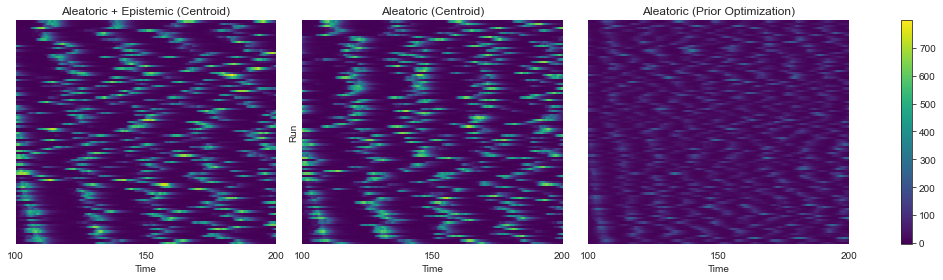

In [51]:
heat_centroid_ale = pd.read_csv("heatmap_centroid_ale.csv", header=None).to_numpy()
heat_centroid_epi = pd.read_csv("heatmap_centroid_epi.csv", header=None).to_numpy()
prior_centroid_ale = pd.read_csv("heatmap_prior_ale.csv", header=None).to_numpy()
prior_centroid_epi = pd.read_csv("heatmap_prior_epi.csv", header=None).to_numpy()

grid = plt.GridSpec(1, 3, width_ratios=[1, 1, 1]) 

vmin = min(np.min(heat_centroid_ale), np.min(heat_centroid_epi), np.min(prior_centroid_ale))
vmax = max(np.max(heat_centroid_ale), np.max(heat_centroid_epi), np.max(prior_centroid_ale))

fig, (ax2, ax1, ax3) = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

sns.heatmap(heat_centroid_ale[:1000, :].T, cmap='viridis', vmin=vmin, vmax=vmax, cbar=False, ax=ax1)
ax1.set_title('Aleatoric (Centroid)')
ax1.set_xlabel("Time")
ax1.set_ylabel("Run")
ax1.set_xticks([0, 500, 1000])
ax1.set_xticklabels([100, 150, 200], rotation=0)
ax1.set_yticks([])

sns.heatmap(heat_centroid_epi[:1000, :].T, cmap='viridis', vmin=vmin, vmax=vmax, cbar=False, ax=ax2)
ax2.set_title('Aleatoric + Epistemic (Centroid)')
ax2.set_xlabel("Time")
ax2.set_xticks([0, 500, 1000])
ax2.set_xticklabels([100, 150, 200], rotation=0)
ax2.set_yticks([])

sns.heatmap(prior_centroid_ale[:1000, :].T, cmap='viridis', vmin=vmin, vmax=vmax, cbar=False,cbar_ax=ax3)
ax3.set_title('Aleatoric (Prior Optimization)')
ax3.set_xlabel("Time")
ax3.set_xticks([0, 500, 1000])
ax3.set_xticklabels([100, 150, 200], rotation=0)
ax3.set_yticks([])

plt.tight_layout()
fig.colorbar(ax3.collections[0], ax=[ax1, ax2, ax3], location='right')
plt.savefig("heatmaps.pdf", format="pdf", bbox_inches="tight")
plt.show()

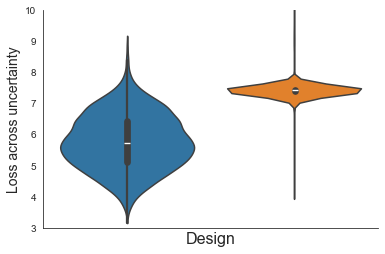

In [52]:
combination_centroid = pd.read_csv("centroid_violin.csv", header=None).to_numpy()

sns.set_style("white")
ax = sns.violinplot(data=[np.concatenate(combination_centroid), combination_prior[:,15]],linewidth=1.5, cut=0)
ax.set_xlabel('Design',fontsize=16)
ax.set_ylabel('Loss across uncertainty',fontsize=14)
ax.set_ylim(3, 10)
ax.set_xticks([])
sns.despine()

plt.savefig("violin_centroid.pdf", format="pdf", bbox_inches="tight") # first one is the centroid, second one is the best prior design